In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
m=100
x=np.linspace(0,10,m).reshape(m,1)
y=x + np.random.randn(m,1)

In [3]:
print('-'*90)

------------------------------------------------------------------------------------------


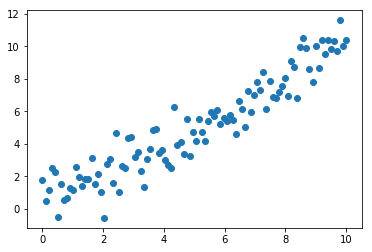

In [4]:
plt.scatter(x,y)

# creation du model de regression lineaire vue que la dataset est lineaire

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
model.score(x,y)


0.8881140743377214

In [6]:
y_prim=model.predict(x)

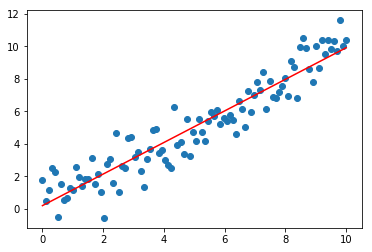

In [7]:
plt.scatter(x,y)
plt.plot(x,y_prim, c='r')

# dataset non lineaire

In [8]:
np.random.seed(0)
m=100
x=np.linspace(0,10,m).reshape(m,1)
y=x**2 + np.random.randn(m,1)


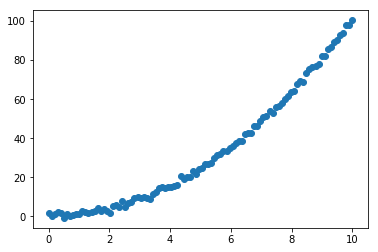

In [9]:
plt.scatter(x,y)

Un model lineaire ne marcera pas là dessus beaucoup de valeur serons exterieurs

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.928782407186839

In [11]:
y_prim=model.predict(x)

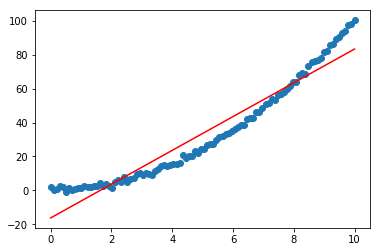

In [12]:
plt.scatter(x,y)
plt.plot(x,y_prim, c='r')

Au lieu de ça on fait avec un svm:

In [13]:
from sklearn.svm import SVR
model = SVR(C=100)
model.fit(x,y)
model.score(x,y)

C:\Users\EMMANUEL MBANGI LUKU\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989763625652847

In [14]:
y_prim=model.predict(x)

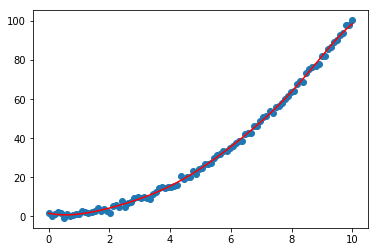

In [15]:
plt.scatter(x,y)
plt.plot(x,y_prim, c='r')

# Creation d'un model de classification (titanic)

In [16]:
import pandas as pd

In [17]:
df=pd.read_excel('titanic_DataSet.xlsx')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings Mrs. John Bradley (Florence Briggs Tha...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.shape

(1309, 12)

In [19]:
df.isnull().sum() #compter le nombre des valeur nulle pour chaque variable

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

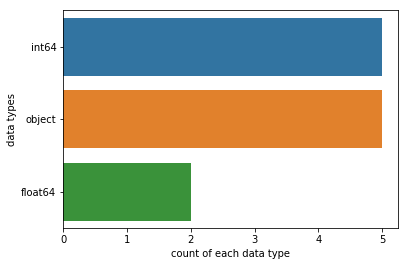

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y=df.dtypes ,data=df)#histograme selon les type de donne
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

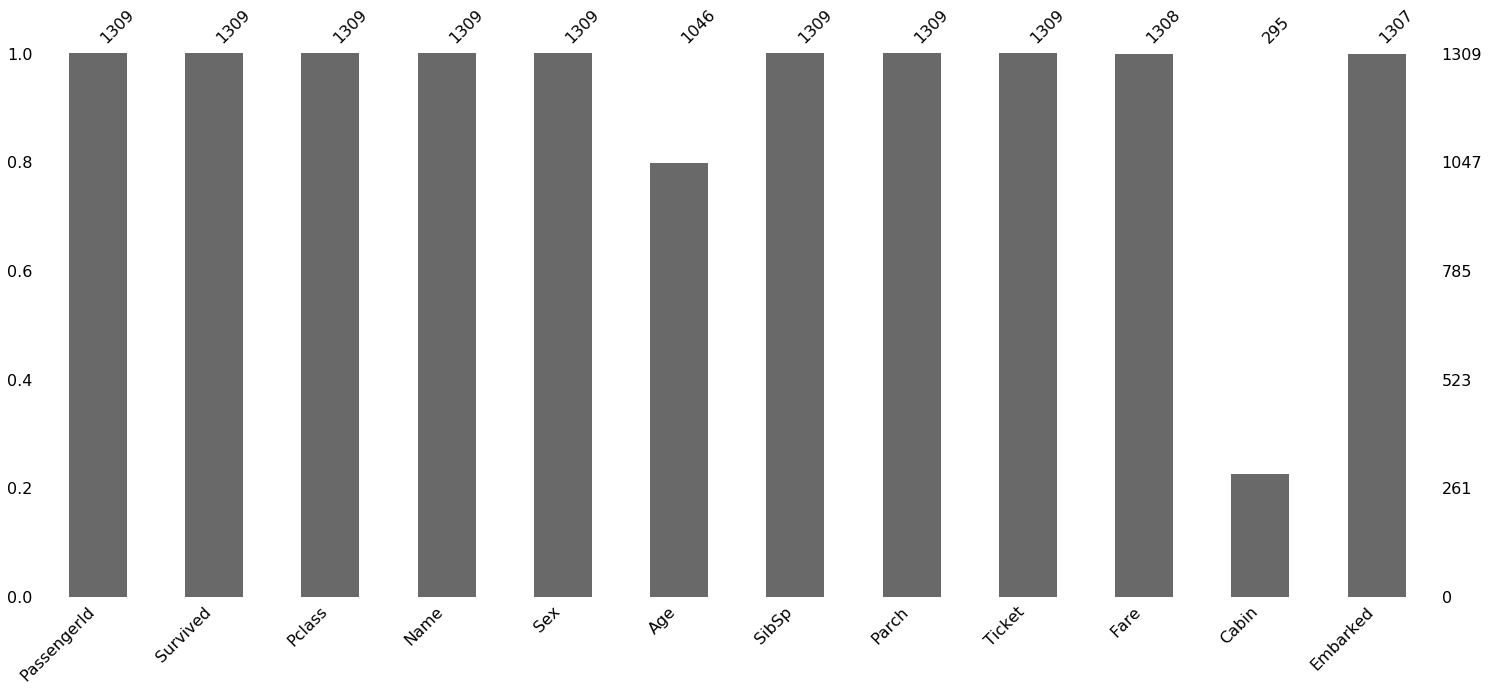

In [21]:
## null count analysis
import missingno as msno
p=msno.bar(df)

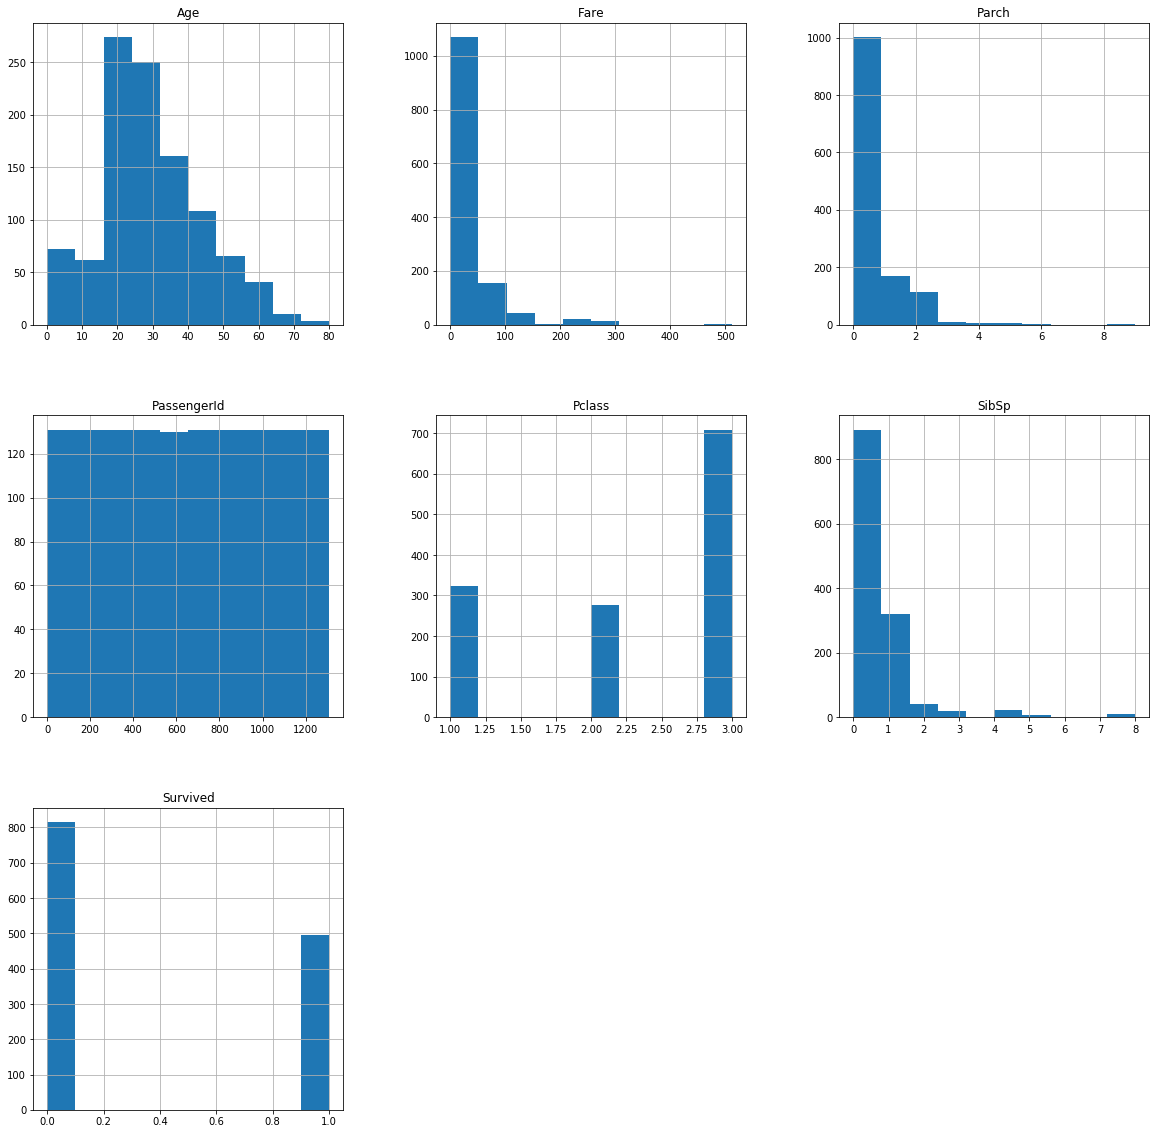

In [22]:
p = df.hist(figsize = (20,20)) #histgrame de données selon leur nbre

In [23]:
df.shape

(1309, 12)

In [24]:
#suppression de valeur nulles dans la dataset
df.dropna(inplace=True)

In [25]:
df.shape

(270, 12)

In [26]:
Mdf= df.drop(['PassengerId','Name', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
Mdf['Sex'].replace(['male','female'],[0,1], inplace=True)
Mdf.head()

,Survived,Pclass,Sex,Age
1,1,1,1,38.0
3,1,1,1,35.0
6,0,1,0,54.0
10,1,3,1,4.0
11,1,1,1,58.0


# creation du model KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [28]:
_y=Mdf['Survived']
_x=Mdf.drop('Survived',axis=1)


In [29]:
_x.astype(float).corr()

,Pclass,Sex,Age
Pclass,1.000000,0.015458,-0.338191
Sex,0.015458,1.000000,-0.116081
Age,-0.338191,-0.116081,1.000000


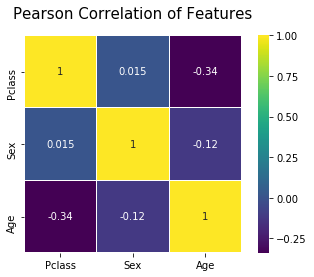

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
_x.astype(float).corr()
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(_x.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [31]:
model.fit(_x,_y) #entrainement
model.score(_x,_y) #precision du model

0.8555555555555555

In [32]:
p=model.predict(_x)  #exploitation du model fini

In [33]:
def predire(model,Pclasse,sexe,age):
    X=np.array([Pclasse,sexe,age]).reshape(1,3)
    print(model.predict(X))
    print("vos chance d'appartenir à chacune de classe (non survis ou survis )")
    print(model.predict_proba(X))

In [34]:
predire(model,2,0,5) #une personne en 1ere classe de sexe masculin avec 5ans comme age aurai survecu

[1]
vos chance d'appartenir à chacune de classe (non survis ou survis )
[[0.2 0.8]]


C:\Users\EMMANUEL MBANGI LUKU\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\EMMANUEL MBANGI LUKU\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


# SELECTION DU MODEL (voir malaria model)

# LEARNING CURVE (voir malaria model)

# PREPROCESSING

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #utiliser pour coder une colone en generale y

# LabelEncoder

In [36]:
y=np.array(['chat','chien','chat','oiseau']) #exemple d'une colone à encoder
encoder = LabelEncoder() #creation de l'operation à utiliser
encoder.fit(y) #creation de l'estimateur
encoder.classes_ #afficher les classe encoder


array(['chat', 'chien', 'oiseau'], dtype='<U6')

In [37]:
encoder.transform(y)#creation du transformer

array([0, 1, 0, 2])

# ou

In [38]:
y=np.array(['chat','chien','chat','oiseau'])
encoder = LabelEncoder()
encoder.fit_transform(y) #pipeliney

array([0, 1, 0, 2], dtype=int32)

<strong>faire l'inverse</strong>

In [39]:
encoder.inverse_transform(np.array([1,0,2,2]))

array(['chien', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [40]:
from sklearn.preprocessing import OrdinalEncoder
x=np.array([['chat','chien','chat','oiseau'],['chat','chien','chat','oiseau']])
encoder = OrdinalEncoder()
encoder.fit_transform(x) #pipeliney

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

encodage one hote

In [41]:
from sklearn.preprocessing import LabelBinarizer
y=np.array(['chat','chien','chat','oiseau'])
encoder = LabelBinarizer()
encoder.fit_transform(y) #pipeliney

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int32)

# Normalisation

In [42]:
from sklearn.preprocessing import MinMaxScaler
x= np.array([[50],[100],[150],[200]])
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])


 # standardisation

In [43]:
 from sklearn.preprocessing import StandardScaler
x= np.array([[50],[100],[150],[200]])
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [44]:
from sklearn.datasets import load_iris

In [45]:
iris = load_iris()
x=iris.data
y=iris.target

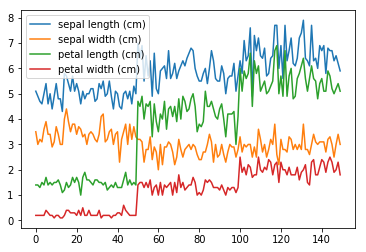

In [46]:
plt.plot(x)
plt.legend(iris.feature_names)

In [47]:
x.var(axis=0)#variance des nos variable

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

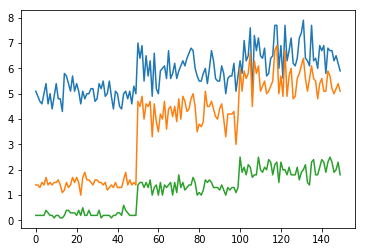

In [48]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.2)

plt.plot(selector.fit_transform(x))

In [49]:
selector.get_support()

array([ True, False,  True,  True])

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')